In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

In [42]:
def calc_ticks(_list, bars):
    _list.sort()
    smaller_value = _list[0]
    bigger_value = _list[-1]
    interval = (bigger_value-smaller_value) / bars
    ticks = [smaller_value]
    last = smaller_value + interval
    ticks.append(last)
    for x in range(bars-1):
        last += interval
        ticks.append(last)
    return ticks

In [43]:
km = pd.Series([4, 8, 9, 11, 13, 15, 17, 17, 18, 19,
               30, 36, 39, 40, 45, 46, 46, 55, 59, 69])

In [44]:
def per_cent(x):
    x = x * 100
    return f'{x:.2f}%'

In [45]:
def relative_frequency(total, yticks):
    rel_freq = []
    for item in yticks:
        x = item/total
        rel_freq.append("{0:.2f}%".format(x*100))
    return rel_freq

In [46]:
def create_histogram(bars, data_series, title, unit):
    _list = data_series.values
    ax = data_series.plot.hist(bins=bars, rwidth=0.95)

    yticks = ax.get_yticks()
    total = len(_list)
    freq_rel = relative_frequency(total, yticks)
    ax.set_yticklabels(freq_rel)

    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    fig.set_dpi(150)

    ticks = calc_ticks(_list, bars)
    plt.xticks(ticks)
    plt.title(title)
    plt.xlabel(unit)
    plt.grid(axis='y')
    plt.show()

In [47]:
data = pd.read_csv('weight-height.csv')

In [48]:
data['Height_cm'] = data['Height'] * 2.54

In [49]:
data['Height_cm'] = data['Height_cm'].round()

In [50]:
data['Weight_kg'] = data['Weight'] * 0.453592

In [51]:
data['Weight_kg'] = data['Weight_kg'].round(1)

In [52]:
weight_women = data.loc[data['Gender'] == 'Female']['Weight_kg']
weight_men = data.loc[data['Gender'] == 'Male']['Weight_kg']

In [53]:
height_women = data.loc[data['Gender'] == 'Female']['Height_cm']
height_men = data.loc[data['Gender'] == 'Male']['Height_cm']

In [54]:
dp_weight_women = stats.stdev(weight_women)
dp_weight_men = stats.stdev(weight_men)
dp_height_men = stats.stdev(height_men)
dp_height_women = stats.stdev(height_women)

In [55]:
mean_weight_women = stats.mean(weight_women)
mean_weight_men = stats.mean(weight_men)
mean_height_men = stats.mean(height_men)
mean_height_women = stats.mean(height_women)

In [56]:
cv_weight_women = dp_weight_women / mean_weight_women
cv_weight_men = dp_weight_men / mean_weight_men

In [57]:
cv_height_women = dp_height_women / mean_height_women
cv_height_men = dp_height_men / mean_height_men

In [58]:
cv_dict = {
    'men': {'cv_weigth': per_cent(cv_weight_men), 'cv_height': per_cent(cv_height_men)},
    'women': {'cv_weigth': per_cent(cv_weight_women), 'cv_height': per_cent(cv_height_women)}
}

In [59]:
cv = pd.DataFrame.from_dict(cv_dict)
cv

,men,women
cv_weigth,10.58%,14.00%
cv_height,4.16%,4.23%


<center><h2>Covariância - População</h2></center>


$$Cov(x,y)={\frac {\sum _{i=1}^{N}(x_{i}-{\mu_{x}})*(y_{i}-{\mu_{y}})}{N}}$$


<center><h2>Covariância - Amostra</h2></center>


$$Cov(x,y)={\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})*(y_{i}-{\overline {y}})}{n-1}}$$


In [60]:
data.head()

,Gender,Height,Weight,Height_cm,Weight_kg
0,Male,73.847017,241.893563,188.0,109.7
1,Male,68.781904,162.310473,175.0,73.6
2,Male,74.110105,212.740856,188.0,96.5
3,Male,71.730978,220.042470,182.0,99.8
4,Male,69.881796,206.349801,177.0,93.6


In [61]:
top_five = data.head()

top_five

,Gender,Height,Weight,Height_cm,Weight_kg
0,Male,73.847017,241.893563,188.0,109.7
1,Male,68.781904,162.310473,175.0,73.6
2,Male,74.110105,212.740856,188.0,96.5
3,Male,71.730978,220.042470,182.0,99.8
4,Male,69.881796,206.349801,177.0,93.6


In [63]:
top_five = top_five[['Height_cm', 'Weight_kg']]
top_five

,Height_cm,Weight_kg
0,188.0,109.7
1,175.0,73.6
2,188.0,96.5
3,182.0,99.8
4,177.0,93.6


In [68]:
mean_height = top_five['Height_cm'].mean()
mean_weight = top_five['Weight_kg'].mean()

In [75]:
top_five_list = list(
    (top_five['Height_cm'] - mean_height) * (top_five['Weight_kg'] - mean_weight))
top_five_list

[90.35999999999993,
 147.28000000000014,
 11.159999999999911,
 0.0,
 5.200000000000102]

In [93]:
top_five_cov = sum(top_five_list) / (len(top_five_list) - 1)

In [78]:
top_five.cov()

,Height_cm,Weight_kg
Height_cm,36.5,63.500
Weight_kg,63.5,175.163


<center><h2>Coeficiente de Correlação</h2></center>


$${\frac {Cov(x,y)}{Stdev(x)*Stdev(y)}}$$


In [90]:
top_five_sd_height = np.std(top_five['Height_cm'], ddof=1)
top_five_sd_height

6.041522986797286

In [86]:
stats.stdev(top_five['Height_cm'])

6.041522986797286

In [91]:
top_five_sd_weight = np.std(top_five['Weight_kg'], ddof=1)
top_five_sd_weight

13.234915942309573

In [98]:
top_five_corr_coef = top_five_cov / (top_five_sd_height * top_five_sd_weight)
top_five_corr_coef

0.7941565198498657

In [109]:
top_five.corr()

,Height_cm,Weight_kg
Height_cm,1.000000,0.794157
Weight_kg,0.794157,1.000000


In [110]:
per_cent(top_five_corr_coef)

'79.42%'

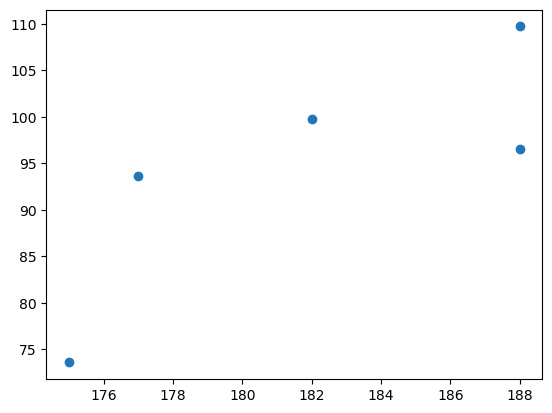

In [112]:
plt.scatter(top_five['Height_cm'], top_five['Weight_kg'])
plt.show()

In [113]:
import seaborn as sns

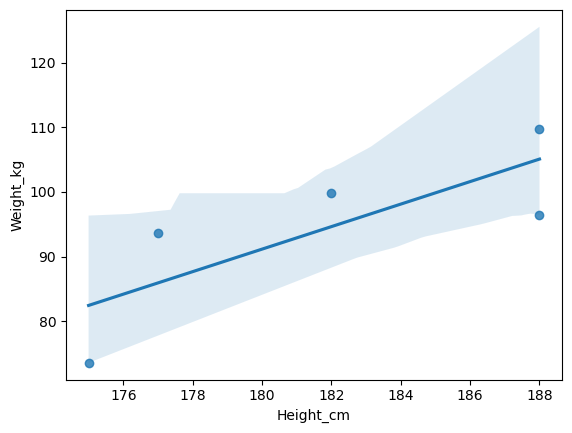

In [125]:
sns.regplot(x=top_five['Height_cm'], y=top_five['Weight_kg'])
plt.show()

In [127]:
women = data.loc[data['Gender'] == 'Female'][['Height_cm', 'Weight_kg']]
men = data.loc[data['Gender'] == 'Male'][['Height_cm', 'Weight_kg']]

In [129]:
men.corr()

,Height_cm,Weight_kg
Height_cm,1.000000,0.862458
Weight_kg,0.862458,1.000000


In [130]:
women.corr()

,Height_cm,Weight_kg
Height_cm,1.00000,0.84897
Weight_kg,0.84897,1.00000


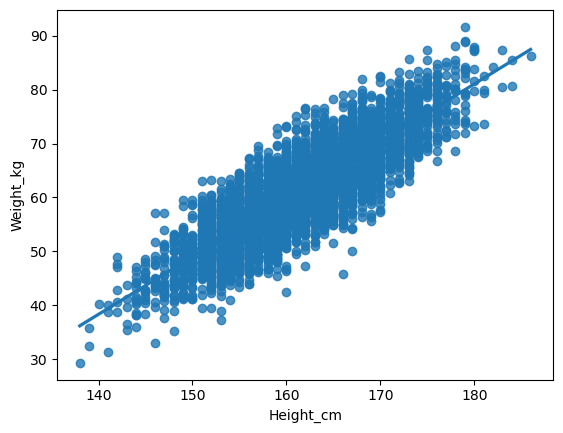

In [134]:
sns.regplot(x=women['Height_cm'], y=women['Weight_kg'])
plt.show()

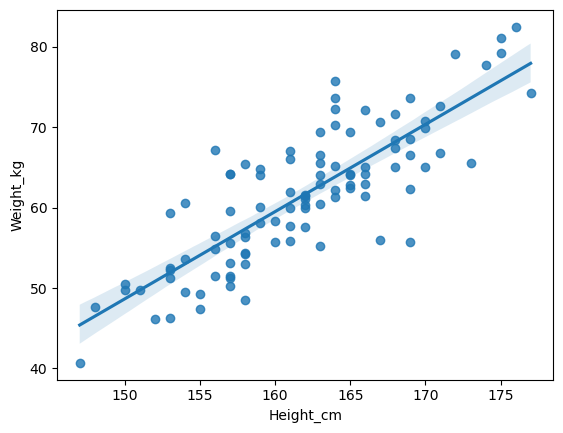

In [135]:
sns.regplot(x=women['Height_cm'][2000:2100], y=women['Weight_kg'][2000:2100])
plt.show()

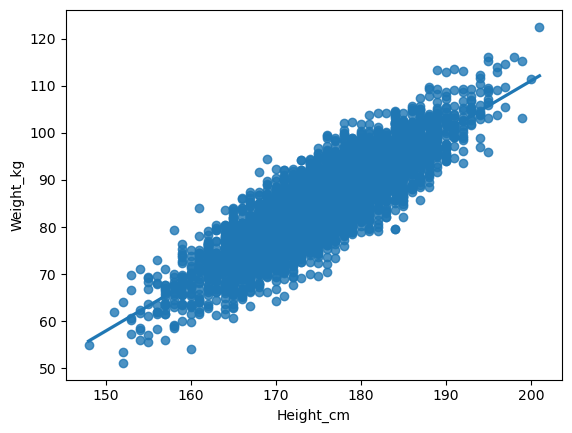

In [136]:
sns.regplot(x=men['Height_cm'], y=men['Weight_kg'])
plt.show()

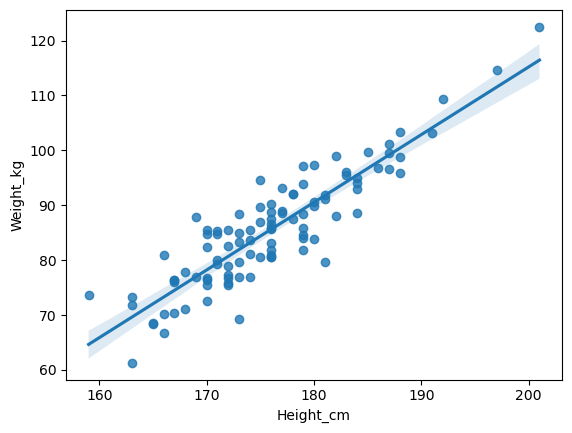

In [137]:
sns.regplot(x=men['Height_cm'][2000:2100], y=men['Weight_kg'][2000:2100])
plt.show()